<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      561 non-null    datetime64[ns]
 1   y       561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


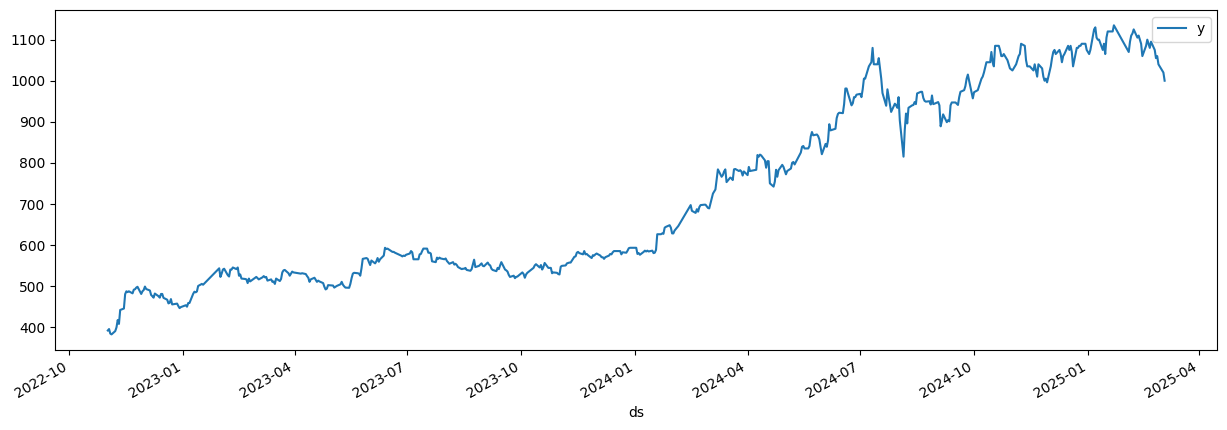

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
from neuralprophet import NeuralProphet, set_log_level, set_random_seed

# Disable logging messages unless there is an error
set_log_level("ERROR")

df = pd.read_csv('2330_stock_data.csv', parse_dates=['ds'])[['ds', 'y']]
plt = df.plot(x="ds", y="y", figsize=(15, 5))
df.info()

In [ ]:
from utils import val_mape

param_grid = {
    # 'yearly_seasonality': [True, False],
    # 'weekly_seasonality': [True, False],
    'n_lags': range(1, 16),
}

results = []
# Iterate over each combination of hyperparameters
for params in ParameterGrid(param_grid):
    # Initialize the NeuralProphet model with current hyperparameters
    print([params])
    m = NeuralProphet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        n_lags=params['n_lags'],
    )
    
    df_train, df_val = m.split_df(df[['ds', 'y']], valid_p=0.2)
    set_random_seed(0)
    metrics = m.fit(df_train, validation_df=df_val)
    
    # Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
    df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=7)

    # Predict the future
    forecast = m.predict(df_future)
    
    rmse = metrics.iloc[-1]['RMSE_val']
    mape = val_mape(df_val, forecast)
    results.append({**params, 'RMSE': rmse, 'MAPE': mape})

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



[{'n_lags': 1}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 284.47it/s]


Training: |          | 0/? [00:08<?, ?it/s, v_num=167, MAE_val=21.30, RMSE_val=26.90, Loss_val=0.0036, RegLoss_val=0.000, train_loss=0.000672, reg_loss=0.000, MAE=8.670, RMSE=12.20, Loss=0.000683, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 410.92it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'n_lags': 2}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 237.97it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=168, MAE_val=19.10, RMSE_val=23.10, Loss_val=0.00267, RegLoss_val=0.000, train_loss=0.00111, reg_loss=0.000, MAE=10.80, RMSE=15.40, Loss=0.00111, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 500.16it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'n_lags': 3}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 285.06it/s]


Training: |          | 0/? [00:08<?, ?it/s, v_num=169, MAE_val=18.20, RMSE_val=21.60, Loss_val=0.00233, RegLoss_val=0.000, train_loss=0.000846, reg_loss=0.000, MAE=9.790, RMSE=13.50, Loss=0.000825, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 487.99it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'n_lags': 4}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 292.65it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=170, MAE_val=15.30, RMSE_val=18.90, Loss_val=0.00177, RegLoss_val=0.000, train_loss=0.000713, reg_loss=0.000, MAE=8.420, RMSE=12.10, Loss=0.000683, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 324.13it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'n_lags': 5}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 286.39it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=171, MAE_val=19.10, RMSE_val=23.50, Loss_val=0.00275, RegLoss_val=0.000, train_loss=0.000821, reg_loss=0.000, MAE=9.550, RMSE=13.20, Loss=0.000796, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 234.69it/s]
[{'n_lags': 6}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 297.18it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=172, MAE_val=21.90, RMSE_val=26.80, Loss_val=0.00359, RegLoss_val=0.000, train_loss=0.0011, reg_loss=0.000, MAE=10.50, RMSE=14.90, Loss=0.00105, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 333.36it/s]
[{'n_lags': 7}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 282.93it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=173, MAE_val=16.50, RMSE_val=20.10, Loss_val=0.00202, RegLoss_val=0.000, train_loss=0.000819, reg_loss=0.000, MAE=9.130, RMSE=12.80, Loss=0.000784, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 333.54it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'n_lags': 8}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 284.28it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=174, MAE_val=18.30, RMSE_val=22.60, Loss_val=0.00256, RegLoss_val=0.000, train_loss=0.000889, reg_loss=0.000, MAE=10.30, RMSE=14.40, Loss=0.000967, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 226.00it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'n_lags': 9}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 277.66it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=175, MAE_val=17.90, RMSE_val=22.00, Loss_val=0.00242, RegLoss_val=0.000, train_loss=0.000892, reg_loss=0.000, MAE=9.580, RMSE=13.20, Loss=0.000841, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 243.66it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'n_lags': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 284.22it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=176, MAE_val=19.70, RMSE_val=24.70, Loss_val=0.00305, RegLoss_val=0.000, train_loss=0.000994, reg_loss=0.000, MAE=10.40, RMSE=14.20, Loss=0.000941, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 285.27it/s]
[{'n_lags': 11}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 273.16it/s]


Training: |          | 0/? [00:08<?, ?it/s, v_num=177, MAE_val=25.50, RMSE_val=31.60, Loss_val=0.00498, RegLoss_val=0.000, train_loss=0.0016, reg_loss=0.000, MAE=13.60, RMSE=18.70, Loss=0.0016, RegLoss=0.000]  

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.03it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'n_lags': 12}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 289.95it/s]


Training: |          | 0/? [00:08<?, ?it/s, v_num=178, MAE_val=22.50, RMSE_val=27.00, Loss_val=0.00362, RegLoss_val=0.000, train_loss=0.00102, reg_loss=0.000, MAE=10.80, RMSE=14.80, Loss=0.00102, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 333.23it/s]
[{'n_lags': 13}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 288.36it/s]


Training: |          | 0/? [00:08<?, ?it/s, v_num=179, MAE_val=20.80, RMSE_val=27.50, Loss_val=0.00377, RegLoss_val=0.000, train_loss=0.000851, reg_loss=0.000, MAE=9.820, RMSE=13.60, Loss=0.00085, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 199.98it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'n_lags': 14}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 267.07it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=180, MAE_val=25.70, RMSE_val=33.00, Loss_val=0.00543, RegLoss_val=0.000, train_loss=0.00136, reg_loss=0.000, MAE=12.80, RMSE=17.10, Loss=0.00137, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.97it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'n_lags': 15}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 272.99it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=181, MAE_val=23.30, RMSE_val=29.40, Loss_val=0.00431, RegLoss_val=0.000, train_loss=0.00104, reg_loss=0.000, MAE=10.90, RMSE=14.90, Loss=0.00105, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 181.61it/s]


In [10]:
results_df = pd.DataFrame(results)
results_df.to_csv('params.csv')
results_df

,n_lags,RMSE,MAPE
0,1,26.872358,0.020052
1,2,23.147129,0.018258
2,3,21.620922,0.017619
3,4,18.853550,0.014574
4,5,23.459017,0.018318
5,6,26.814184,0.020828
6,7,20.146513,0.015556
7,8,22.632006,0.017222
8,9,22.013899,0.016730
9,10,24.721390,0.018713


In [11]:
results_df.sort_values(by="RMSE")

,n_lags,RMSE,MAPE
3,4,18.853550,0.014574
6,7,20.146513,0.015556
2,3,21.620922,0.017619
8,9,22.013899,0.016730
7,8,22.632006,0.017222
1,2,23.147129,0.018258
4,5,23.459017,0.018318
9,10,24.721390,0.018713
5,6,26.814184,0.020828
0,1,26.872358,0.020052


In [12]:
results_df.sort_values(by="MAPE")

,n_lags,RMSE,MAPE
3,4,18.853550,0.014574
6,7,20.146513,0.015556
8,9,22.013899,0.016730
7,8,22.632006,0.017222
2,3,21.620922,0.017619
1,2,23.147129,0.018258
4,5,23.459017,0.018318
9,10,24.721390,0.018713
12,13,27.500681,0.019267
0,1,26.872358,0.020052
